In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, confusion_matrix
import xgboost
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from time import time

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

* [Approach 1](#approach-1-applying-the-median-to-simple-imputer-in-addition-to-standard-scaler-to-numerical-features-considering-all-features-in-the-analysis)
* [Approach 2](#approach-2-exploring-the-data-and-feature-engineering)
* [Developing a complete pipeline](#developing-a-complete-pipeline)

Retrieving the Titanic dataset in [Kaggle](https://www.kaggle.com/c/titanic/data) website.

In [178]:
data = pd.read_csv('datasets/titanic/train.csv', delimiter=',')

In [179]:
data.shape

(891, 12)

In [8]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [10]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [12]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [13]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [14]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [15]:
print(data['Ticket'].unique().shape)
data['Ticket'].head()

(681,)


0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [16]:
print(data['Fare'].unique().shape)
data['Fare'].describe()

(248,)


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
print(data['Cabin'].unique().shape)
data['Cabin'].unique()

(148,)


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
sum(data['Survived'].isna().astype(int))

0

In [20]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
data_num = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data_cat = data[['Sex', 'Embarked']]

In [23]:
display(data_num.head(2))
display(data_cat.head(2))

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833


,Sex,Embarked
0,male,S
1,female,C


In [5]:
cabin_data = data['Cabin']

In [6]:
cabin_list = []

for i in cabin_data:
    if type(i) != float:
        cabin_list.append(i[0])
    else:
        cabin_list.append('Z')
        

print(len(cabin_list))
np.unique(cabin_list, return_counts=True)

891


(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype='<U1'),
 array([ 15,  47,  59,  33,  32,  13,   4,   1, 687], dtype=int64))

In [7]:
data_cat.insert(data_cat.shape[1], 'Cabin', cabin_list)

In [8]:
data_cat.head(2)

,Sex,Embarked,Cabin
0,male,S,Z
1,female,C,C


In [28]:
np.sum(data_cat.isna())

Sex         0
Embarked    2
Cabin       0
dtype: int64

In [9]:
data_cat['Embarked'].isnull().sum()

2

In [8]:
mode_cat = data_cat['Embarked'].mode(dropna=False).values[0]
data_cat['Embarked'].fillna(mode_cat)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [9]:
data_num_no_id = data_num.copy()
data_cat_no_id = data_cat.copy()

data_num_no_id.reset_index(drop=True, inplace=True)
data_cat_no_id.reset_index(drop=True, inplace=True)

In [10]:
data_combined = pd.concat([data_num_no_id, data_cat_no_id], axis=1)
data_combined.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Cabin
0,3,22.0,1,0,7.2500,male,S,Z
1,1,38.0,1,0,71.2833,female,C,C


##### Approach 1: applying the median to Simple Imputer in addition to Standard Scaler to numerical features, considering all features in the analysis

In [12]:
num_features = data_num.columns.values
cat_features = data_cat.columns.values

pipeline_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num_pipe', pipeline_num, num_features),
    ('cat_pipe', OneHotEncoder(), cat_features)
])

In [13]:
data_preprocessed = full_pipeline.fit_transform(data_combined)

In [35]:
print(data_preprocessed.shape)
data_preprocessed[0]

(891, 20)


array([ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [14]:
X = data_preprocessed
y = data['Survived']
print(X.shape, y.shape)

(891, 20) (891,)


Testing trainning models:

In [15]:
rf_clf = RandomForestClassifier()
xg_clf = xgboost.XGBClassifier()
svm_clf = SVC()
kneig_clf = KNeighborsClassifier()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [39]:
cross_val_score(rf_clf, X_train, y_train, cv=5).mean()

0.8174332709543977

In [40]:
cross_val_score(xg_clf, X_train, y_train, cv=5).mean()

0.8005515611149413

In [45]:
cross_val_score(svm_clf, X_train, y_train, cv=5).mean()

0.8244853737811484

In [48]:
cross_val_score(kneig_clf, X_train, y_train, cv=5).mean()

0.8146163695459471

Grid Search for individual classifiers:

In [60]:
param_grid_rf = {'n_estimators':[10,50,100,200],
                 'max_depth':[None,2,5,10,50], 'min_samples_split':[2,10], 'max_samples':[None,0.9]}

param_grid_xg = {'eta':[0.1,0.3,0.5], 'gamma':[0,1,2], 'max_depth':[2,6,10],
                 'max_delta_step':[0,1], 'subsample':[0.5,1]}

param_grid_svm = {'kernel':['linear','poly','rbf','sigmoid'], 'degree':[2,3,4,5], 'gamma':['scale','auto'], 'coef0':[0,1,2]}

param_grid_kneig = {'n_neighbors':[3,5,9,12], 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree'],
                    'leaf_size':[20,30,40], 'p':[1,2,3]}

In [52]:
grid_rf = GridSearchCV(rf_clf, param_grid=param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 5, 10, 50],
                         'max_samples': [None, 0.9],
                         'min_samples_split': [2, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [53]:
grid_rf.best_params_

{'max_depth': 10,
 'max_samples': 0.9,
 'min_samples_split': 10,
 'n_estimators': 10}

In [56]:
rf_best_clf = grid_rf.best_estimator_

In [57]:
rf_best_clf.score(X_test, y_test)

0.8044692737430168

In [59]:
grid_xg = GridSearchCV(xg_clf, param_grid=param_grid_xg, cv=5)
grid_xg.fit(X_train, y_train)

print(grid_xg.best_params_)
xg_best_clf = grid_xg.best_estimator_
print(xg_best_clf.score(X_test, y_test))

{'eta': 0.3, 'gamma': 1, 'max_delta_step': 1, 'max_depth': 6, 'subsample': 1}
0.8100558659217877


In [61]:
grid_svm = GridSearchCV(svm_clf, param_grid=param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print(grid_svm.best_params_)
svm_best_clf = grid_svm.best_estimator_
print(svm_best_clf.score(X_test, y_test))

{'coef0': 1, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}
0.8100558659217877


In [62]:
grid_kneig = GridSearchCV(kneig_clf, param_grid=param_grid_kneig, cv=5)
grid_kneig.fit(X_train, y_train)

print(grid_kneig.best_params_)
kneig_best_clf = grid_kneig.best_estimator_
print(kneig_best_clf.score(X_test, y_test))

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
0.8212290502793296


Using some ensemble classifiers:

In [65]:
voting_clf = VotingClassifier(estimators=[('rf', rf_best_clf), ('xg', xg_best_clf), ('svm', svm_best_clf), ('kneig', kneig_best_clf)])
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_samples=0.9,
                                                     min_samples_split=10,
                                                     n_estimators=10)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.3,
                                            eval_metric=None,
                                            feature_types=No...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=1, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...)),
                             ('svm',
                              SVC(coef0=1, degree=5, gamma='auto',
                                  kernel='poly')),
                             ('kneig',
                              KNeighborsClassifier(leaf_size=20, n_neighbors=12,
                                                   p=1))])

In [66]:
voting_clf.score(X_test, y_test)

0.8268156424581006

In [22]:
param_grid_rf = {'rf__n_estimators':[100,200], 'rf__max_depth':[None,10]}

param_grid_xg = {'xg__eta':[0.3,0.5], 'xg__gamma':[0,1]}

param_grid_svm = {'svm__kernel':['poly','rbf'], 'svm__degree':[3,5]}

param_grid_kneig = {'kneig__n_neighbors':[5,12], 'kneig__leaf_size':[30,40]}

params = dict()
for d in (param_grid_rf, param_grid_xg, param_grid_svm, param_grid_kneig):
    params.update(d)

print(params)

{'rf__n_estimators': [100, 200], 'rf__max_depth': [None, 10], 'xg__eta': [0.3, 0.5], 'xg__gamma': [0, 1], 'svm__kernel': ['poly', 'rbf'], 'svm__degree': [3, 5], 'kneig__n_neighbors': [5, 12], 'kneig__leaf_size': [30, 40]}


In [23]:
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('xg', xg_clf), ('svm', svm_clf), ('kneig', kneig_clf)])

grid_voting = GridSearchCV(voting_clf, param_grid=params, cv=5, verbose=1, n_jobs=1, pre_dispatch=1)
grid_voting.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('rf',
                                                     RandomForestClassifier()),
                                                    ('xg',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   gpu_id=None,
                                                                   grow_policy=None,
                                                                   im...
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=None, ...)),
                                                    ('svm', SVC()),
                                                    ('kneig',
                                                     KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'kneig__leaf_size': [30, 40],
                         'kneig__n_neighbors': [5, 12],
                         'rf__max_depth': [None, 10],
                         'rf__n_estimators': [100, 200], 'svm__degree': [3, 5],
                         'svm__kernel': ['poly', 'rbf'], 'xg__eta': [0.3, 0.5],
                         'xg__gamma': [0, 1]},
             pre_dispatch=1, verbose=1)

In [24]:
grid_voting.best_params_

{'kneig__leaf_size': 30,
 'kneig__n_neighbors': 5,
 'rf__max_depth': 10,
 'rf__n_estimators': 100,
 'svm__degree': 3,
 'svm__kernel': 'rbf',
 'xg__eta': 0.3,
 'xg__gamma': 0}

In [25]:
voting_best_clf = grid_voting.best_estimator_

In [26]:
voting_best_clf.score(X_test, y_test)

0.8212290502793296

##### Approach 2: exploring the data and feature engineering

In [28]:
print(X.shape)

tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X)

print(X_tsne.shape)

(891, 20)
(891, 2)


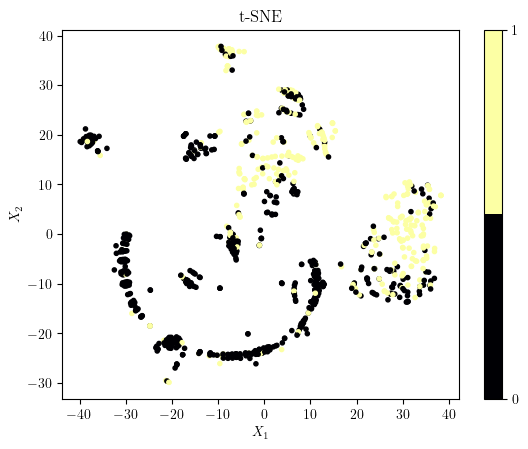

In [30]:
n = len(np.unique(y.astype(int)))

plot = plt.scatter(X_tsne[:,0].ravel(), X_tsne[:,1].ravel(), marker='.', c=y.astype(int), cmap=plt.cm.get_cmap('inferno', n))
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

plt.colorbar(plot, ticks=range(0,10))
plt.title('t-SNE')
plt.show()

In [11]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


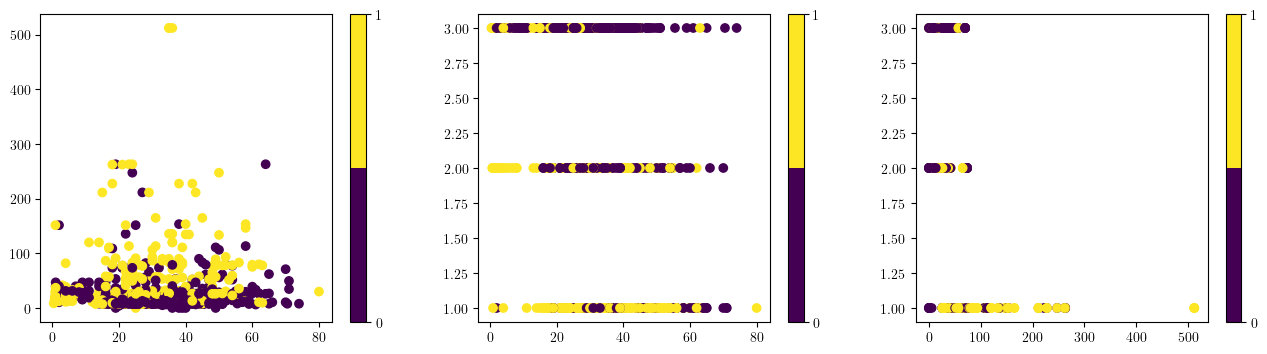

In [68]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plot = plt.scatter(data['Age'], data['Fare'], c=data['Survived'].astype(int), cmap=plt.cm.get_cmap('viridis',2))
plt.colorbar(plot, ticks=(0,1))

plt.subplot(1,3,2)
plot = plt.scatter(data['Age'], data['Pclass'], c=data['Survived'].astype(int), cmap=plt.cm.get_cmap('viridis',2))
plt.colorbar(plot, ticks=(0,1))

plt.subplot(1,3,3)
plot = plt.scatter(data['Fare'], data['Pclass'], c=data['Survived'].astype(int), cmap=plt.cm.get_cmap('viridis',2))
plt.colorbar(plot, ticks=(0,1))

plt.show()

In [12]:
data[data['Fare'] > 400]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,259,1,1,female,35.0,0,0,512.3292,NaN,C
679,680,1,1,male,36.0,0,1,512.3292,B51 B53 B55,C
737,738,1,1,male,35.0,0,0,512.3292,B101,C


In [70]:
data[data['Fare'] > 400].index

Int64Index([258, 679, 737], dtype='int64')

In [81]:
data[data['Fare'] > 400]['Fare'].values

array([512.3292, 512.3292, 512.3292])

In [83]:
data['Fare'].median()

14.4542

In [117]:
data['Cabin'].unique().shape

(148,)

In [219]:
new_features = ['Age_Fare','Age_Pclass','Fare_Pclass','Family_number','Passenger_Cabin']

data_no_anomaly = data.replace(data[data['Fare'] > 400]['Fare'].values, data['Fare'].median())

data_cat = data_no_anomaly[['Sex', 'Embarked']]

In [85]:
data_no_anomaly[data_no_anomaly['Fare'] > 400]['Fare'].values

array([], dtype=float64)

In [128]:
data_no_anomaly.groupby('Cabin')['Cabin'].transform('count').shape

(891,)

In [220]:
data_num = data_no_anomaly[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
m,n = data_num.shape
print(m,n)

891 5


In [216]:
title_list = []

for name in data['Name']:
    flag = False
    for word in name.split():
        if '.' in word:
            flag = True
            title_list.append(word)
            break
    if flag == False:
        title_list.append('No.')
print(len(title_list))

891


In [221]:
data_num.insert(5, 'Age_Fare', data_no_anomaly['Age']/data_no_anomaly['Fare'])
data_num.insert(6, 'Age_Pclass', data_no_anomaly['Age']/data_no_anomaly['Pclass'])
data_num.insert(7, 'Fare_Pclass', data_no_anomaly['Fare']/data_no_anomaly['Pclass'])
data_num.insert(8, 'Family_number', data_no_anomaly['SibSp'] + data_no_anomaly['Parch'])
data_cat.insert(2, 'Title', title_list)
# data_num.insert(9, 'Passenger_Cabin', data_no_anomaly.groupby('Cabin')['Cabin'].transform('count'))

In [222]:
data_num.head()

,Pclass,Age,SibSp,Parch,Fare,Age_Fare,Age_Pclass,Fare_Pclass,Family_number
0,3,22.0,1,0,7.2500,3.034483,7.333333,2.416667,1
1,1,38.0,1,0,71.2833,0.533084,38.000000,71.283300,1
2,3,26.0,0,0,7.9250,3.280757,8.666667,2.641667,0
3,1,35.0,1,0,53.1000,0.659134,35.000000,53.100000,1
4,3,35.0,0,0,8.0500,4.347826,11.666667,2.683333,0


In [223]:
data_cat.head()

,Sex,Embarked,Title
0,male,S,Mr.
1,female,C,Mrs.
2,female,S,Miss.
3,female,S,Mrs.
4,male,S,Mr.


In [224]:
data_num_no_id = data_num.copy()
data_cat_no_id = data_cat.copy()

data_num_no_id.reset_index(drop=True, inplace=True)
data_cat_no_id.reset_index(drop=True, inplace=True)

In [133]:
data_num_no_id[data_num_no_id['Age_Fare'] == np.inf]

,Pclass,Age,SibSp,Parch,Fare,Age_Fare,Age_Pclass,Fare_Pclass,Passenger_Cabin,Family_number
179,3,36.0,0,0,0.0,inf,12.000000,0.0,NaN,0
263,1,40.0,0,0,0.0,inf,40.000000,0.0,1.0,0
271,3,25.0,0,0,0.0,inf,8.333333,0.0,NaN,0
302,3,19.0,0,0,0.0,inf,6.333333,0.0,NaN,0
597,3,49.0,0,0,0.0,inf,16.333333,0.0,NaN,0
806,1,39.0,0,0,0.0,inf,39.000000,0.0,1.0,0
822,1,38.0,0,0,0.0,inf,38.000000,0.0,NaN,0


In [225]:
data_num_no_id = data_num_no_id.replace(np.inf, data_num_no_id['Age_Fare'].median())

In [135]:
data_num_no_id[data_num_no_id['Age_Fare'] == np.inf]

,Pclass,Age,SibSp,Parch,Fare,Age_Fare,Age_Pclass,Fare_Pclass,Passenger_Cabin,Family_number


In [226]:
data_combined = pd.concat([data_num_no_id, data_cat_no_id], axis=1)
data_combined.head(2)

,Pclass,Age,SibSp,Parch,Fare,Age_Fare,Age_Pclass,Fare_Pclass,Family_number,Sex,Embarked,Title
0,3,22.0,1,0,7.2500,3.034483,7.333333,2.416667,1,male,S,Mr.
1,1,38.0,1,0,71.2833,0.533084,38.000000,71.283300,1,female,C,Mrs.


In [227]:
num_features = data_num.columns.values
cat_features = data_cat.columns.values

pipeline_num = Pipeline([
    ('imputer_nan', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num_pipe', pipeline_num, num_features),
    ('cat_pipe', OneHotEncoder(), cat_features)
])

In [228]:
data_preprocessed = full_pipeline.fit_transform(data_combined)

In [229]:
X = data_preprocessed
y = data['Survived']
print(X.shape, y.shape)

(891, 32) (891,)


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [231]:
rf_clf = RandomForestClassifier()
xg_clf = xgboost.XGBClassifier()
svm_clf = SVC()
kneig_clf = KNeighborsClassifier()

print('RF:', cross_val_score(rf_clf, X_train, y_train, cv=5).mean())
print('XGB:', cross_val_score(xg_clf, X_train, y_train, cv=5).mean())
print('SVM:', cross_val_score(svm_clf, X_train, y_train, cv=5).mean())
print('K-Neig:', cross_val_score(kneig_clf, X_train, y_train, cv=5).mean())

svm_clf.fit(X_train, y_train)
prediction_svm = svm_clf.score(X_test, y_test)

print('SVM test data:', prediction_svm)

RF: 0.8118093174431203
XGB: 0.7963163596966414
SVM: 0.8315079286910272
K-Neig: 0.8117600709150004
SVM test data: 0.8156424581005587


In [232]:
param_grid_rf = {'rf__n_estimators':[100,200], 'rf__max_depth':[None,10]}

param_grid_xg = {'xg__eta':[0.3,0.5], 'xg__gamma':[0,1]}

param_grid_svm = {'svm__kernel':['poly','rbf'], 'svm__degree':[3,5]}

param_grid_kneig = {'kneig__n_neighbors':[5,12], 'kneig__leaf_size':[30,40]}

params = dict()
for d in (param_grid_rf, param_grid_xg, param_grid_svm, param_grid_kneig):
    params.update(d)

print(params)

voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('xg', xg_clf), ('svm', svm_clf), ('kneig', kneig_clf)])

grid_voting = GridSearchCV(voting_clf, param_grid=params, cv=5, verbose=1, n_jobs=1, pre_dispatch=1)
grid_voting.fit(X_train, y_train)

{'rf__n_estimators': [100, 200], 'rf__max_depth': [None, 10], 'xg__eta': [0.3, 0.5], 'xg__gamma': [0, 1], 'svm__kernel': ['poly', 'rbf'], 'svm__degree': [3, 5], 'kneig__n_neighbors': [5, 12], 'kneig__leaf_size': [30, 40]}
Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('rf',
                                                     RandomForestClassifier()),
                                                    ('xg',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   gpu_id=None,
                                                                   grow_policy=None,
                                                                   im...
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=None, ...)),
                                                    ('svm', SVC()),
                                                    ('kneig',
                                                     KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'kneig__leaf_size': [30, 40],
                         'kneig__n_neighbors': [5, 12],
                         'rf__max_depth': [None, 10],
                         'rf__n_estimators': [100, 200], 'svm__degree': [3, 5],
                         'svm__kernel': ['poly', 'rbf'], 'xg__eta': [0.3, 0.5],
                         'xg__gamma': [0, 1]},
             pre_dispatch=1, verbose=1)

In [233]:
voting_best_clf = grid_voting.best_estimator_
grid_voting.best_params_

{'kneig__leaf_size': 40,
 'kneig__n_neighbors': 5,
 'rf__max_depth': 10,
 'rf__n_estimators': 100,
 'svm__degree': 5,
 'svm__kernel': 'poly',
 'xg__eta': 0.5,
 'xg__gamma': 0}

In [234]:
cross_val_score(voting_best_clf, X_train, y_train, cv=10).mean()

0.8242957746478872

In [235]:
voting_best_clf.score(X_test, y_test)

0.8379888268156425

##### Developing a complete pipeline:

In [104]:
def data_split(df):
    data_num = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
    data_cat = df[['Sex', 'Embarked']]
    return data_num, data_cat

def including_relational_features(df_num):
    m,n = df_num.shape
    df_num.insert(n, 'Age_Fare', df_num['Age']/df_num['Fare'])
    df_num.insert(n+1, 'Age_Pclass', df_num['Age']/df_num['Pclass'])
    df_num.insert(n+2, 'Fare_Pclass', df_num['Fare']/df_num['Pclass'])
    df_num.insert(n+3, 'Family_number', df_num['SibSp'] + df_num['Parch'])
    return df_num

def including_title(df, df_cat):
    title_list = []

    for name in df['Name']:
        flag = False
        for word in name.split():
            if '.' in word:
                flag = True
                title_list.append(word)
                break
        if flag == False:
            title_list.append('No.')
    m,n = df_cat.shape
    df_cat.insert(n, 'Title', title_list)
    return df_cat

def including_cabin(df, df_cat):
    cabin_list = []
    for i in df['Cabin']:
        if type(i) != float:
            cabin_list.append(i[0])
        else:
            cabin_list.append('Z')
    m,n = df_cat.shape
    df_cat.insert(n, 'Cabin', cabin_list)
    return df_cat

def remove_inf(df_num):
    df_num = df_num.replace(np.inf, df_num['Age_Fare'].median())
    return df_num

def remove_id(df_num, df_cat):
    df_num.reset_index(drop=True, inplace=True)
    df_cat.reset_index(drop=True, inplace=True)
    return df_num, data_cat

def remove_anomaly(df_num):
    df_num = df_num.replace(df_num[df_num['Fare'] > 400]['Fare'].values, df_num['Fare'].median())
    return df_num

def combine_dataframes(df_num, df_cat):
    data_combined = pd.concat([df_num, df_cat], axis=1)
    return data_combined

def data_preprocessing(df):
    data_num, data_cat = data_split(df)
    data_num = including_relational_features(data_num)
    data_cat = including_title(df, data_cat)
    data_cat = including_cabin(df, data_cat)
    data_num = remove_inf(data_num)
    data_num = remove_anomaly(data_num)
    # data_num, data_cat = remove_id(data_num, data_cat)
    data_combined = combine_dataframes(data_num, data_cat)

    num_features = data_num.columns.values
    cat_features = data_cat.columns.values

    pipeline_num = Pipeline([
        ('imputer_nan', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
    ])

    full_pipeline = ColumnTransformer([
        ('num_pipe', pipeline_num, num_features),
        ('cat_pipe', OneHotEncoder(), cat_features)
    ])
    
    X = full_pipeline.fit_transform(data_combined)

    try:
        y = df['Survived']
    except:
        y = None
    Id = df['PassengerId'].to_numpy()

    return X, y, Id

In [164]:
def training_voting_model(X_train, y_train):
    rf_clf = RandomForestClassifier()
    xg_clf = xgboost.XGBClassifier()
    svm_clf = SVC()
    kneig_clf = KNeighborsClassifier()

    param_grid_rf = {'rf__n_estimators':[100,105], 'rf__max_depth':[None,10]}

    param_grid_xg = {'xg__eta':[0.5,0.6], 'xg__gamma':[0,0.1]}

    param_grid_svm = {'svm__kernel':['poly','rbf'], 'svm__degree':[4,5]}

    param_grid_kneig = {'kneig__n_neighbors':[5,7], 'kneig__leaf_size':[40,45]}

    params = dict()
    for d in (param_grid_rf, param_grid_xg, param_grid_svm, param_grid_kneig):
        params.update(d)

    voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('xg', xg_clf), ('svm', svm_clf), ('kneig', kneig_clf)])
    
    grid_voting = GridSearchCV(voting_clf, param_grid=params, cv=5, verbose=1, n_jobs=1, pre_dispatch=1)
    grid_voting.fit(X_train, y_train)

    return grid_voting.best_estimator_, grid_voting.best_params_, grid_voting.cv_results_

In [118]:
data_train = pd.read_csv('datasets/titanic/train.csv', delimiter=',')
data_test = pd.read_csv('datasets/titanic/test.csv', delimiter=',')

data_ = pd.concat([data_train, data_test], axis=0)

X_, y_, Id_ = data_preprocessing(data_)

X_train, y_train, Id_train = X_[:891], y_[:891], Id_[:891]
X_test, Id_test = X_[891:], Id_[891:]

In [108]:
voting_estimator, voting_params, cv_results = training_voting_model(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


In [119]:
max(cv_results['mean_test_score'])

0.8428786642395331

In [120]:
cross_val_score(voting_estimator, X_train, y_train, cv=10).mean()

0.8339450686641697

In [121]:
y_pred = voting_estimator.predict(X_test)
y_pred.shape

(418,)

In [156]:
final_array = np.c_[Id_test, y_pred]

np.savetxt('datasets/titanic/titanic_prediction.csv', final_array, fmt='%i', delimiter=',', header='PassengerId,Survived', comments='')

##### Fine-tunning individual models

SVM:

In [173]:
svm_clf = SVC()

param_grid_svm = {'C':[0.6,0.8,0.9], 'kernel':['poly','rbf','sigmoid'], 'degree':[3,4,5], 
                  'gamma':['scale','auto'], 'coef0':[0.1,0.2,0.3]}

grid_svm = GridSearchCV(svm_clf, param_grid_svm, cv=7)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [0.6, 0.8, 0.9], 'coef0': [0.1, 0.2, 0.3],
                         'degree': [3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [174]:
svm_best_clf = grid_svm.best_estimator_
grid_svm.best_params_

{'C': 0.8, 'coef0': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [176]:
cross_val_score(svm_best_clf, X_train, y_train, cv=5).mean()

0.8204193082669011

XGBoost:

In [200]:
xg_clf = xgboost.XGBClassifier()
param_grid_xg = {'eta':[0.1,0.3,0.5,0.6], 'gamma':[0,0.1,1], 'max_depth':[6,9],
                 'min_child_weight':[1,2], 'max_delta_step':[0,0.1], 'lambda':[0.5,1,2]}

niter = 1
for key, values in param_grid_xg.items():
    niter = len(values) * niter
print('Number of iterations:',niter)

grid_xg = GridSearchCV(xg_clf, param_grid_xg, cv=5)

grid_xg.fit(X_train, y_train)

xg_best_clf = grid_xg.best_estimator_
grid_xg.best_params_

Number of iterations: 288


{'eta': 0.5,
 'gamma': 1,
 'lambda': 2,
 'max_delta_step': 0.1,
 'max_depth': 6,
 'min_child_weight': 1}

In [203]:
max(grid_xg.cv_results_['mean_test_score'])

0.8372732408511707

In [204]:
cross_val_score(xg_best_clf, X_train, y_train, cv=10).mean()

0.8204868913857677

Random Forest:

In [223]:
rf_clf = RandomForestClassifier()

param_grid_rf = {'n_estimators':[80,100,120], 'criterion':['gini', 'entropy', 'log_loss'],
                 'max_depth':[None,10,20,50], 'min_samples_split':[2,3,5],
                 'min_samples_leaf':[1,2],'max_leaf_nodes':[None,10], 
                 'max_samples':[None, 0.8]}

ti = time()
cross_val_score(rf_clf, X_train, y_train, cv=5)
tf = time()

niter = 1
for key, values in param_grid_rf.items():
    niter = len(values) * niter
print('Number of iterations:', niter, '/ Estimated %.1f minutes'%(niter*(tf-ti)/60))

grid_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

rf_best_clf = grid_rf.best_estimator_
print(grid_rf.best_params_)
print(grid_rf.best_score_)

Number of iterations: 864 / Estimated 23.4 minutes
{'criterion': 'log_loss', 'max_depth': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}
0.839507877722679


In [225]:
cross_val_score(rf_best_clf, X_train, y_train, cv=5).mean()

0.8327788588286988

In [228]:
y_pred = rf_best_clf.predict(X_test)
print(y_pred.shape)

final_array = np.c_[Id_test, y_pred]

np.savetxt('datasets/titanic/titanic_prediction_rf.csv', final_array, fmt='%i', delimiter=',', header='PassengerId,Survived', comments='')

(418,)
